# DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

# Problem Statement Scenario: 
 Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive
innovations.These include the passenger safety cell with the crumple zone,the airbag, and intelligent assistance
systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among 
premium carmakers. Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of 
features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, Daimler’s 
engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars,
safety and efficiency are paramount on Daimler’s production lines. However, optimizing the speed of their 
testing system for many possible feature combinations is complex and time-consuming without a powerful 
algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset
representing different permutations of features in a Mercedes-Benz car to predict the time it takes to 
pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide 
emissions without reducing Daimler’s standards.

# Following actions should be performed:
* If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
* Check for null and unique values for test and train sets
* Apply label encoder.
* Perform dimensionality reduction.
* Predict your test_df values using xgboost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
MCtrain = pd.read_csv('mercedes-train.csv')

In [3]:
MCtrain.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
MCtest = pd.read_csv('mercedes-test.csv')

In [5]:
MCtest.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
print(MCtrain.shape)
print(MCtest.shape)

(4209, 378)
(4209, 377)


In [7]:
MCtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [8]:
MCtest.dtypes

ID       int64
X0      object
X1      object
X2      object
X3      object
         ...  
X380     int64
X382     int64
X383     int64
X384     int64
X385     int64
Length: 377, dtype: object

In [9]:
MCtrain.dtypes

ID        int64
y       float64
X0       object
X1       object
X2       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: object

In [10]:
MCtrain.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [11]:
MCtest.columns

Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=377)

In [12]:
MCtrain.isnull().sum().sort_values(ascending=False)

ID      0
X254    0
X263    0
X262    0
X261    0
       ..
X127    0
X126    0
X125    0
X124    0
X385    0
Length: 378, dtype: int64

In [13]:
MCtest.isnull().sum().sort_values(ascending=False)

ID      0
X255    0
X264    0
X263    0
X262    0
       ..
X128    0
X127    0
X126    0
X125    0
X385    0
Length: 377, dtype: int64

# Check for variance of the columns, and drop those columns from the data¶


In [14]:
def var_zero_cols(df):
    var_df=pd.DataFrame(df.var(),columns=['Variance'])
    return(list(var_df[var_df.Variance==0].index))

In [15]:
var_zero_cols(MCtrain)

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [16]:
var_zero_cols(MCtest)

['X257', 'X258', 'X295', 'X296', 'X369']

In [17]:
var_df=pd.DataFrame(MCtrain.var(),columns=['Variance'])

In [18]:
MCtrain.drop(columns=list(var_df[var_df.Variance==0].index),inplace=True)

In [19]:
var_df=pd.DataFrame(MCtest.var(),columns=['Variance'])

In [20]:
MCtest.drop(columns=list(var_df[var_df.Variance==0].index),inplace=True)

In [21]:
print(MCtrain.shape)
print(MCtest.shape)

(4209, 366)
(4209, 372)


In [22]:
MCtrain_ucnt=pd.DataFrame(MCtrain.nunique(),columns=['uniqueCount'])

In [23]:
MCtest_unct=pd.DataFrame(MCtest.nunique(),columns=['uniqueCount'])

In [24]:
MCtrain_ucnt[MCtrain_ucnt.uniqueCount>2]

,uniqueCount
ID,4209
y,2545
X0,47
X1,27
X2,44
X3,7
X4,4
X5,29
X6,12
X8,25


In [25]:
MCtrain_ucnt[MCtrain_ucnt.uniqueCount<=2]

,uniqueCount
X10,2
X12,2
X13,2
X14,2
X15,2
...,...
X380,2
X382,2
X383,2
X384,2


In [26]:
MCtrain1=MCtrain.drop('y',axis=1)

In [27]:
print(MCtrain.shape)
print(MCtest.shape)

(4209, 366)
(4209, 372)


In [28]:
numericdata=MCtrain.select_dtypes(include=np.number)
objectdata=MCtrain.select_dtypes(include=np.object)
print(numericdata.shape)
print(objectdata.shape)

(4209, 358)
(4209, 8)


<ipython-input-28-36f33ac4d413>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  objectdata=MCtrain.select_dtypes(include=np.object)


In [29]:
numericdata=MCtest.select_dtypes(include=np.number)
objectdata=MCtest.select_dtypes(include=np.object)
print(numericdata.shape)
print(objectdata.shape)

(4209, 364)
(4209, 8)


<ipython-input-29-8525ce1d3f5a>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  objectdata=MCtest.select_dtypes(include=np.object)


In [30]:
MCtest.columns

Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=372)

In [31]:
MCtrain.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=366)

# It shows there are 8 object data & 364 numeric data

In [32]:
# Apply lable Encoding
from sklearn.preprocessing import LabelEncoder


In [33]:
le= LabelEncoder()

In [34]:
MCtrain_feature =MCtrain.drop(columns={'y','ID'})
MCtrain_target=MCtrain.y

In [35]:
print(MCtrain_feature.shape)
print(MCtrain_target.shape)

(4209, 364)
(4209,)


In [36]:
label_columns= MCtrain.describe(include=['object'])
label_columns

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,v,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [37]:
MCtrain_feature['X0']=le.fit_transform(MCtrain.X0)
MCtrain_feature['X1']=le.fit_transform(MCtrain.X1)
MCtrain_feature['X2']=le.fit_transform(MCtrain.X2)
MCtrain_feature['X3']=le.fit_transform(MCtrain.X3)
MCtrain_feature['X4']=le.fit_transform(MCtrain.X4)
MCtrain_feature['X5']=le.fit_transform(MCtrain.X5)
MCtrain_feature['X6']=le.fit_transform(MCtrain.X6)
MCtrain_feature['X8']=le.fit_transform(MCtrain.X8)

### PERFORM DIMENTIONALITY REDUCTION

In [38]:
print(MCtrain_feature.shape)
print(MCtrain_target.shape)

(4209, 364)
(4209,)


In [39]:
from sklearn.decomposition import PCA

In [40]:
pca=PCA(n_components=.95, svd_solver="full")

In [41]:
pca.fit(MCtrain_feature,MCtrain_target)

PCA(n_components=0.95, svd_solver='full')

In [42]:
MCtrain_feature_trans= pca.fit_transform(MCtrain_feature)
print(MCtrain_feature_trans.shape)

(4209, 6)


In [43]:
pca.explained_variance_ratio_

array([0.38334782, 0.21388033, 0.13261866, 0.11826642, 0.09206008,
       0.01590604])

## Predict your test_df values using XGBoost

### Building the model by using train data set.

In [44]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [45]:
x_train,x_test,y_train,y_test=train_test_split(MCtrain_feature_trans, MCtrain_target,test_size=0.2, random_state=7)

In [46]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3367, 6)
(3367,)
(842, 6)
(842,)


## XGBoost's Hyperparameters Tuning Manually

In [47]:
xgb_reg=xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.3, learning_rate=0.4, max_depth=10, alpha=6, n_estimator=20)

In [48]:
model= xgb_reg.fit(x_train,y_train)

[16:45:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:45:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [49]:
rsme= sqrt(mean_squared_error(model.predict(x_test),y_test))
rsme

13.103623286623934

C:\Users\TANU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\TANU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


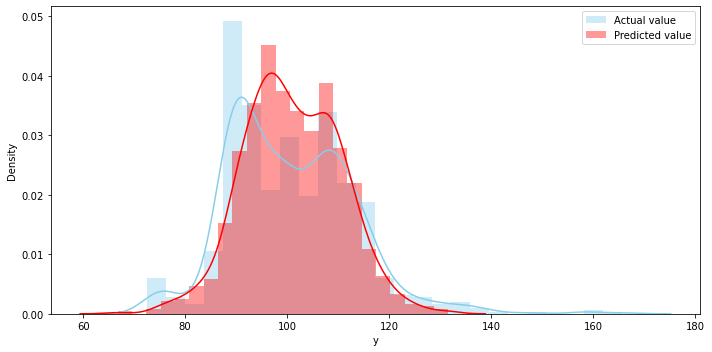

In [50]:
pred_y_test = model.predict(x_test)

plt.figure(figsize=(10,5))

sns.distplot(y_test[y_test<180], color="skyblue", label="Actual value")
sns.distplot(pred_y_test[pred_y_test<180] , color="red", label="Predicted value")
plt.legend()

plt.tight_layout()

## K-Fold Cross Validation Using XGBoost

In [51]:
dmatrix_train= xgb.DMatrix(data=MCtrain_feature_trans, label=MCtrain_target)


In [52]:
params={'objective':'reg:linear', 'colsample_bytree':0.3,'learning_rate':0.3, 'max_depth':5, 'alpha':10}



In [53]:
model_cv= xgb.cv(dtrain=dmatrix_train, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=7)
model_cv.tail()

[16:45:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:45:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[16:45:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
30,9.005161,0.157335,11.061645,0.747588
31,8.935207,0.183407,11.060047,0.736218
32,8.880284,0.174860,11.044371,0.740167
33,8.849045,0.185327,11.049081,0.738352
34,8.792400,0.202136,11.043290,0.728256


* Using K fold cross validation , RSME comes as 11.04. so RSME reduced by~20% 

## Prediction on test data set using XGBoost

In [64]:
MCtest_feature= MCtest.drop(columns={'ID'})

In [65]:
MCtest_feature.shape

(4209, 371)

In [66]:
MCtest_feature.describe(include='object')

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,49,27,45,7,4,32,12,25
top,ak,aa,as,c,d,v,g,e
freq,432,826,1658,1900,4203,246,1073,274


In [68]:
MCtest_feature['X0']=le.fit_transform(MCtest.X0)
MCtest_feature['X1']=le.fit_transform(MCtest.X1)
MCtest_feature['X2']=le.fit_transform(MCtest.X2)
MCtest_feature['X3']=le.fit_transform(MCtest.X3)
MCtest_feature['X4']=le.fit_transform(MCtest.X4)
MCtest_feature['X5']=le.fit_transform(MCtest.X5)
MCtest_feature['X6']=le.fit_transform(MCtest.X6)
MCtest_feature['X8']=le.fit_transform(MCtest.X8)


In [69]:
pca.fit(MCtest_feature)

PCA(n_components=0.95, svd_solver='full')

In [70]:
MCtest_feature_trans=pca.fit_transform(MCtest_feature)

In [71]:
MCtest_feature_trans.shape

(4209, 6)

In [73]:
MCtest_pred= model.predict(MCtest_feature_trans)
MCtest_pred

array([ 83.71109,  95.91763, 104.60099, ...,  90.74739, 122.20523,
       102.37282], dtype=float32)

C:\Users\TANU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\TANU\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


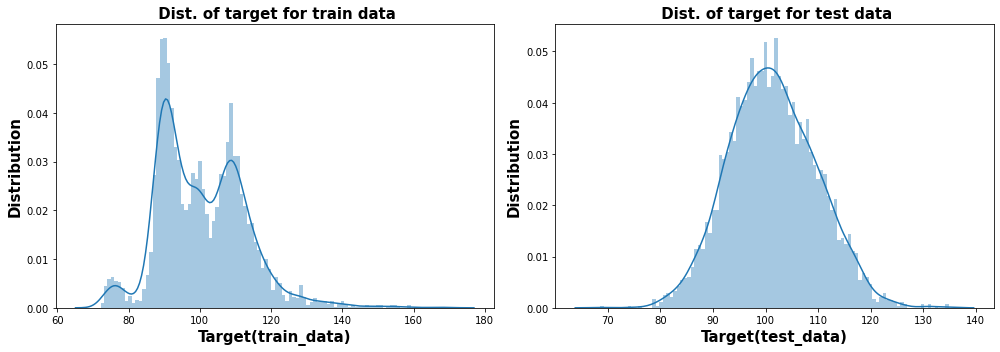

In [79]:
fig, ax= plt.subplots(1,2, figsize=(14,5))

train_plot = sns.distplot(MCtrain_target[MCtrain_target<200], bins=100, kde=True, ax=ax[0])
train_plot.set_xlabel('Target(train_data)', weight='bold', size=15)
train_plot.set_ylabel('Distribution', weight='bold', size=15)
train_plot.set_title(' Dist. of target for train data', weight='bold', size=15)

test_plot = sns.distplot(MCtest_pred[MCtest_pred<200], bins=100, kde=True, ax=ax[1])
test_plot.set_xlabel('Target(test_data)', weight='bold', size=15)
test_plot.set_ylabel('Distribution', weight='bold', size=15)
test_plot.set_title(' Dist. of target for test data', weight='bold', size=15)

plt.tight_layout()



* This is a pictorial view for comparison between the target for training data-set and predicted target for testing data-set